In [6]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import defaultdict
from collections import  Counter
from PIL import Image
import numpy as np 
import pandas as pd 
import re
import gensim
import string
import graphviz
from tqdm import tqdm

from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense,SpatialDropout1D
from keras.layers import Conv1D

from keras.initializers import Constant
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.layers import (BatchNormalization,Dense,
                          TimeDistributed, Dropout, Bidirectional,Flatten, GlobalMaxPool1D)

from keras_preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import os

from glob import glob 
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf

import pathlib
pd.set_option('display.max_colwidth', 255)

In [13]:
base_dir = '../Final_Project/train/'
print(os.listdir(base_dir))
dogs_path = (base_dir+"dogs")

['cats', 'dogs', '__MACOSX']


# Hello! Below are some of the visualizations from my project.

This project was an attempt to use CNN to perform binary classification on images of cats and dogs. The original dataset can be found at the link below.
The data set  came from Microsofts website. It is a set of about 23,000 jpg. images of cats and dogs for training machine learning algoritms. (11,500 cats and 11,500 dogs)  
There were no missing images, there were no duplicate file names. The data set itself was fairly clean. The images had typical 3 channel encoding (rgb)

The images did need to be resized, there were many different sizes. 
About 400 to be exact. 





https://www.microsoft.com/en-US/download/details.aspx?id=54765

The first part of this notebook is the loading and visualization of  images of dogs and cats. 
After that, some metrics about the images themselves. 

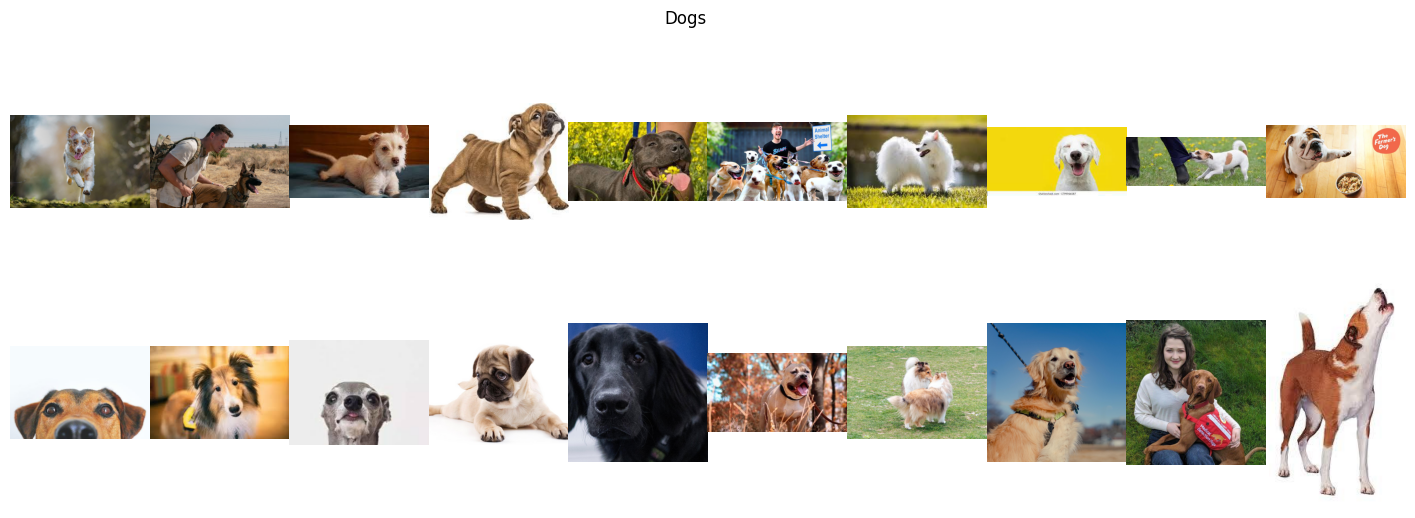

In [14]:
from PIL import Image, ImageDraw

fig,ax = plt.subplots(2,10,figsize=(18,6))
plt.subplots_adjust(wspace=0, hspace=0) 
for i,j in enumerate(dog_df['id'][:2*10]):
    fname = os.path.join(base_dir +j+'.jpg').replace("\\","/")
    img = Image.open(fname)
    idcol = ImageDraw.Draw(img)
    plt.subplot(2, 10, i+1) 
    plt.imshow(np.array(img))
    plt.axis('off')
    title = ("Dogs")
    plt.suptitle(title, y=0.94)

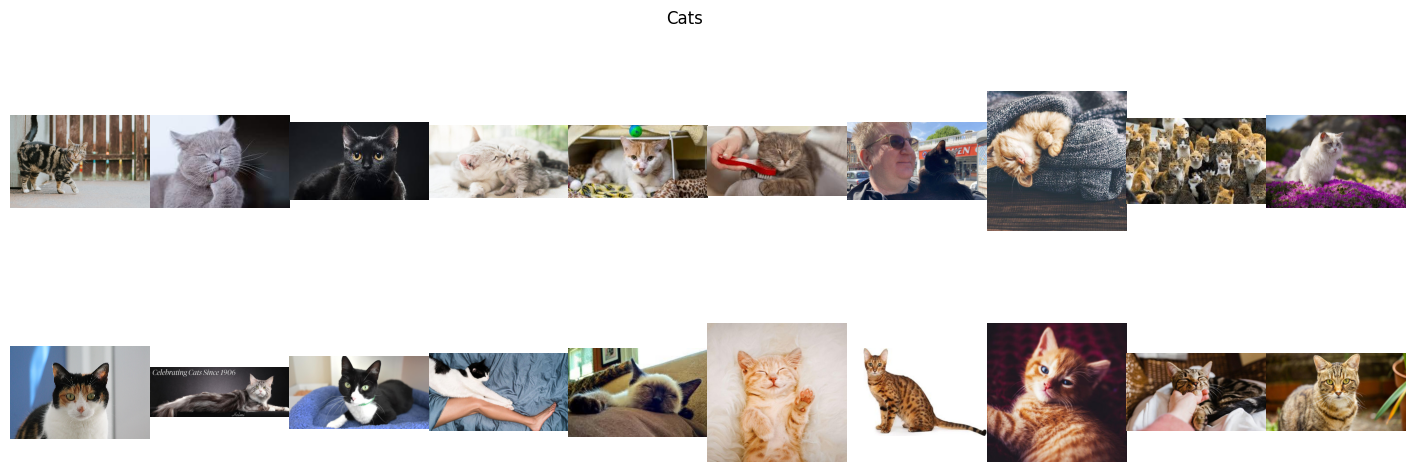

In [15]:

from PIL import Image, ImageDraw

fig,ax = plt.subplots(2,10,figsize=(18,6))
plt.subplots_adjust(wspace=0, hspace=0) 
for i,j in enumerate(cat_df['id'][:2*10]):
    fname = os.path.join(base_dir +j+'.jpg').replace("\\","/")
    img = Image.open(fname)
    idcol = ImageDraw.Draw(img)
    plt.subplot(2, 10, i+1) 
    plt.imshow(np.array(img))
    plt.axis('off')
    title = ("Cats")
    plt.suptitle(title, y=0.94)

# Below this block of code are a few visualizations. 
About the average dimensions of the photos and about average color distribution of the two categories. 



All this work just to show you how many files there are. (About 25,000 give or take a few)

In [45]:
root_dir = "../Final_Project/Final_project_images/images/images/"   # Root directory, where they all live
train_path_dogs = root_dir+'train/Dogs'
train_path_cats = root_dir+'train/Cats' # Since this is binary classification we have a positive and negative
val_path_dogs= root_dir+'val/Dogs'
val_path_cats = root_dir +'val/Cats'
test_path_dogs = root_dir+'test/Dogs'
test_path_cats = root_dir+'test/Cats'
## Now to make a dataframe with all of the needed paths
train_df_dogs = pd.DataFrame({'path': glob(os.path.join(train_path_dogs,'*.jpg'))})
train_df_cats = pd.DataFrame({'path': glob(os.path.join(train_path_cats,'*.jpg'))})
val_df_dogs = pd.DataFrame({'path': glob(os.path.join(val_path_dogs,'*.jpg'))})
val_df_cats = pd.DataFrame({'path': glob(os.path.join(val_path_cats,'*.jpg'))})
test_df_dogs = pd.DataFrame({'path': glob(os.path.join(test_path_dogs,'*.jpg'))})
test_df_cats = pd.DataFrame({'path': glob(os.path.join(test_path_cats,'*.jpg'))})
train_df_dogs['label']= 0
train_df_cats['label']= 1
val_df_dogs['label'] = 0
val_df_cats['label'] = 1
test_df_dogs['label'] = 0
test_df_cats['label'] = 1

train_df = shuffle(pd.concat([train_df_dogs, train_df_cats], axis=0).reset_index(drop=True))
val_df = shuffle(pd.concat([val_df_dogs, val_df_cats], axis=0).reset_index(drop=True))
test_df = shuffle(pd.concat([test_df_dogs,test_df_cats],axis = 0).reset_index(drop=True))

In [46]:
len(train_df)

16616

In [47]:
len(val_df)

4745

In [48]:
len(test_df)

2367

# Now the code for some of the visualizations.

The plots below show that the majority of images were about 350 pixels high by 500 pixels wide. Across both categories cats and dogs.
As well as the color density of the two categories.

In [17]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
base_dir = '../Final_Project/Final+project_images/images/images'
print(os.listdir(base_dir))
dogs_path = (base_dir+"dogs")

In [18]:
import PIL
from PIL import Image

widthst = []
heightst = []
traindir= "../Final_Project/Final_project_images/images/images/train/Cats/"
for img in os.listdir(traindir):
    img_path = os.path.join(traindir + img ) # Making image file path
    im = Image.open(img_path)
    widthst.append(im.size[0])
    heightst.append(im.size[1])
    pixel_values = list(im.getdata())

In [19]:
widthdt = []
heightdt = []
traindir= "../Final_Project/Final_project_images/images/images/train/Dogs/"
for img in os.listdir(traindir):
    img_path = os.path.join(traindir + img ) # Making image file path
    im = Image.open(img_path)
    widthdt.append(im.size[0])
    heightdt.append(im.size[1])
    pixel_values1 = list(im.getdata())

c:\gitfiles\Lib\site-packages\PIL\TiffImagePlugin.py:858: UserWarning: Truncated File Read
  warnings.warn(str(msg))


In [21]:
widthab = []
heightab = []
traindir= "../Final_Project/Final_project_images/images/images/val/Cats/"
for img in os.listdir(traindir):
    img_path = os.path.join(traindir + img ) # Making image file path
    im = Image.open(img_path)
    widthab.append(im.size[0])
    heightab.append(im.size[1])

In [20]:
widthcd = []
heightcd = []
traindir= "../Final_Project/Final_project_images/images/images/val/Dogs/"
for img in os.listdir(traindir):
    img_path = os.path.join(traindir + img ) # Making image file path
    im = Image.open(img_path)
    widthcd.append(im.size[0])
    heightcd.append(im.size[1])

In [22]:
widthef = []
heightef = []
traindir= "../Final_Project/Final_project_images/images/images/test/Cats/"
for img in os.listdir(traindir):
    img_path = os.path.join(traindir + img ) # Making image file path
    im = Image.open(img_path)
    widthef.append(im.size[0])
    heightef.append(im.size[1])

In [23]:
widthgh = []
heightgh = []
traindir= "../Final_Project/Final_project_images/images/images/test/Cats/"
for img in os.listdir(traindir):
    img_path = os.path.join(traindir + img ) # Making image file path
    im = Image.open(img_path)
    widthgh.append(im.size[0])
    heightgh.append(im.size[1])

In [24]:
widths5 = [widthst,widthdt,widthab,widthcd,widthef,widthgh]
heights5 = [heightst,heightdt,heightab,heightcd,heightef,heightgh]

In [25]:
import itertools
nowtry = (list(itertools.chain.from_iterable(heights5)))
nowtry_w = (list(itertools.chain.from_iterable(widths5)))

In [26]:
now_heights = np.array(nowtry)
now_widths = np.array(nowtry_w)

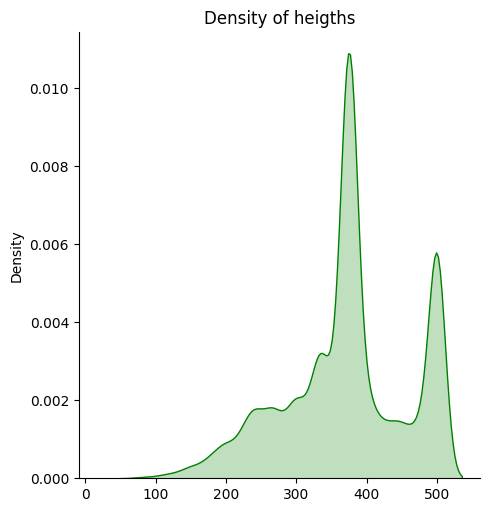

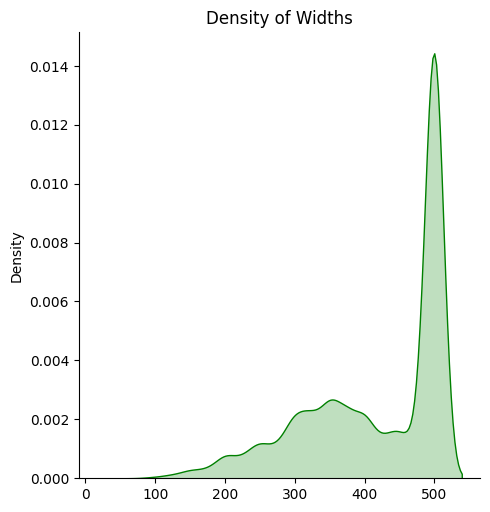

In [27]:
ax = sns.displot(now_heights,kind='kde',fill=True,color="green").set(title='Density of heigths')
ax = sns.displot(now_widths,kind='kde',fill=True,color="green").set(title='Density of Widths')

Text(0.5, 1.0, 'Number of unique values in each category')

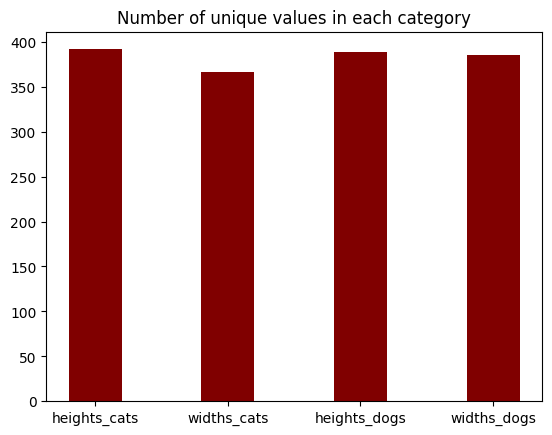

In [28]:
values = ['heights_cats','widths_cats','heights_dogs','widths_dogs']
datas = [392,366,389,386]
plt.bar(values, datas, color ='maroon',
        width = 0.4,)
plt.title("Number of unique values in each category")

In [29]:
pixel_vals_b = [x[0] for x in pixel_values]
pixel_vals_g = [x[1] for x in pixel_values]
pixel_vals_r = [x[2] for x in pixel_values]

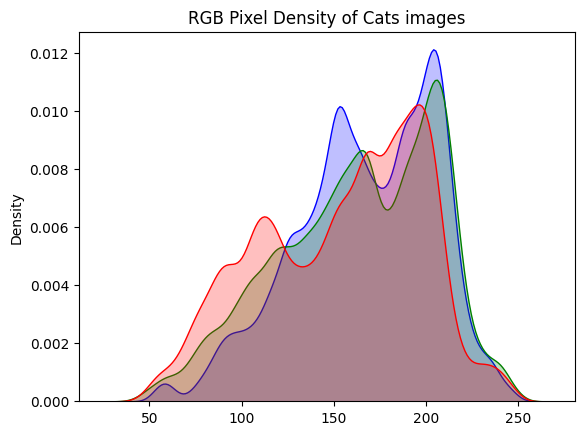

In [30]:
ax = plt.axes()
sns.kdeplot(pixel_vals_b, ax=ax,color='blue',fill=True).set(title='RGB Pixel Density of Cats images')
sns.kdeplot(pixel_vals_g, ax=ax,color='green', fill = True)
sns.kdeplot(pixel_vals_r, ax=ax,color='red', fill =True)
plt.show()

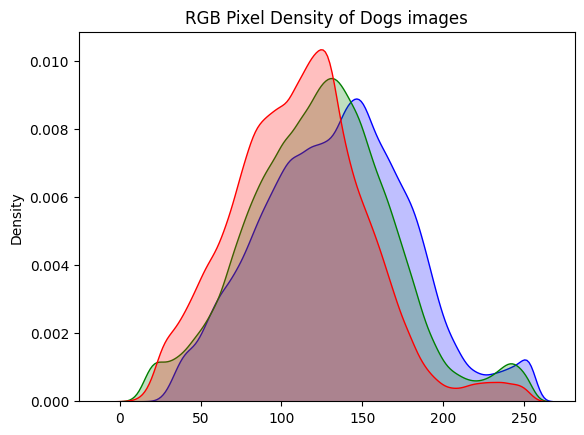

In [31]:
pixel_vals_b1 = [x[0] for x in pixel_values1]
pixel_vals_g1 = [x[1] for x in pixel_values1]
pixel_vals_r1 = [x[2] for x in pixel_values1]
ax = plt.axes()
sns.kdeplot(pixel_vals_b1, ax=ax,color='blue',fill=True).set(title='RGB Pixel Density of Dogs images')
sns.kdeplot(pixel_vals_g1, ax=ax,color='green', fill = True)
sns.kdeplot(pixel_vals_r1, ax=ax,color='red', fill =True)
plt.show()